In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
# Clean text data
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# Convert sentiment to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

max_length = 200
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [6]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 229ms/step - accuracy: 0.5133 - loss: 0.6933 - val_accuracy: 0.5464 - val_loss: 0.6861
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 224ms/step - accuracy: 0.6266 - loss: 0.6537 - val_accuracy: 0.6909 - val_loss: 0.6112
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.6927 - loss: 0.5977 - val_accuracy: 0.6761 - val_loss: 0.6059
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.7363 - loss: 0.5260 - val_accuracy: 0.8475 - val_loss: 0.3506
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.8934 - loss: 0.2764 - val_accuracy: 0.8634 - val_loss: 0.3288
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.9282 - loss: 0.2040 - val_accuracy: 0.8640 - val_loss: 0.3507
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.9469 - loss: 0.1612 - val_accuracy: 0.8618 - val_loss: 0.3847
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.9621 - loss: 0

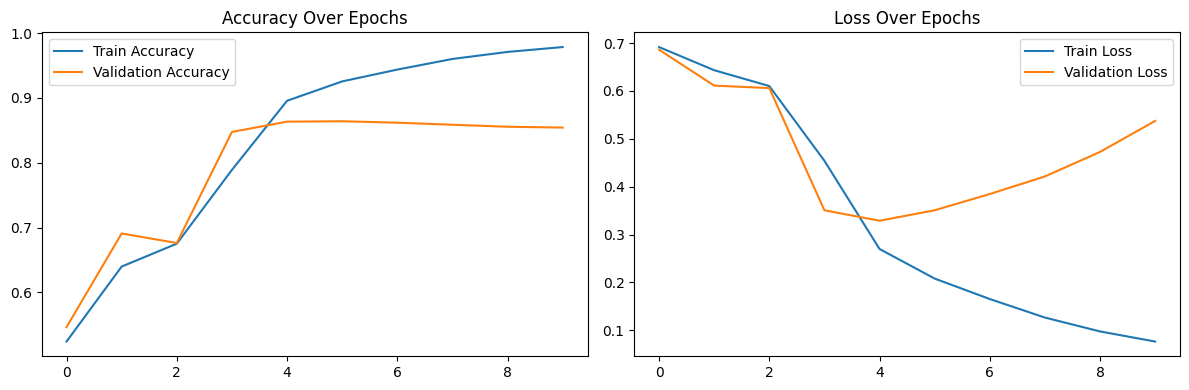

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.8714 - loss: 0.4847

Test Accuracy: 0.8649
Test Loss: 0.5107
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step


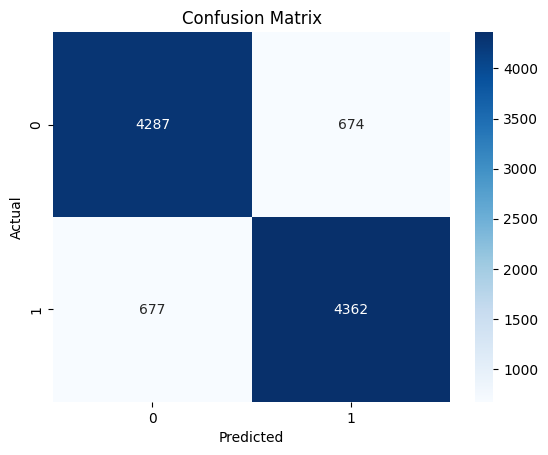


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.87      0.87      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [9]:
# Test set evaluation
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [10]:
sample_text = ["This movie was absolutely fantastic! The acting was superb and the plot kept me engaged throughout.", 
               "Terrible waste of time. Poor acting and a nonsensical storyline."]

# Preprocess
sample_sequences = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding='post', truncating='post')

# Predict
predictions = (model.predict(sample_padded) > 0.5).astype("int32")
sentiments = ['positive' if pred == 1 else 'negative' for pred in predictions]

for text, sentiment in zip(sample_text, sentiments):
    print(f"Text: {text[:60]}...\nPredicted Sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Text: This movie was absolutely fantastic! The acting was superb a...
Predicted Sentiment: positive

Text: Terrible waste of time. Poor acting and a nonsensical storyl...
Predicted Sentiment: negative

